# Penn Electric Racing Data Analyzer: PERDA

Welcome to PERDA: PER custom python library for data processing needs.

Instructions:
- This is a template notebook to demonstrate PERDA.
- PERDA can be installed locally, or on google colab.
- Having access to PERDA github repo will give you access to the library
- Please follow instructions for online OR local installation.


In [1]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import os

## Colab Instructions:

We use github repo to install the library. Simply run the following code to install perda:

In [ ]:
# Run this cell for perda updates, and potential branch changes
ORG_NAME = "Penn-Electric-Racing"
REPO_NAME = "PER-Data-Analyzer"
BRANCH = "main"  # Branch Input

!pip uninstall -y perda #Avoid perda overlap incase of updates
!pip install git+https://github.com/{ORG_NAME}/{REPO_NAME}.git@{BRANCH}

You can mount PER google drive and access data files if you have access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''path to folder --> Choose your path, personal or PER drive'''

#folder_path = '/content/drive/MyDrive/REV8/TESTING/REV8 Testing Data/'
folder_path = '/content/drive/Shareddrives/FSAE Penn Electric Racing/REV8/TESTING/REV8 Testing Data'

'''If using uploaded file, comment previous and uncomment next'''
#folder_path = 'relative/path/to/your/file'

In [ ]:
#run this cell if you need to see the available directories
os.listdir(folder_path)

In [ ]:
# Name of the log file
logfile = folder_path + "/10_08/01_01_00 12_18_59 AM.csv"
'''
if using personal drive
'''
#logfile = "/04_24/04_24_23 07_41_13 PM.csv"
'''
If using uploaded file, comment previous and uncomment next
'''
#logfile = folder_path

## Local Instructions

PERDA can also be installed locally. You will need to clone the git repo locally.

- Open terminal, `cd` to the folder you want to put repo
- Run `git clone https://github.com/Penn-Electric-Racing/PER-Data-Analyzer.git`
- Make sure your python env is activated, then run `pip install .`
- Set your path for logfile

In [2]:
# logfile = "path/to/your/csv/file"
logfile = "../Tests/csv files/[Practice Endurance] 05_25_23 09_39_05 PM.csv" #example

## Code Demo

Import perda and create instance. You can create multiple perda instence for reading multiple csv at the same time.

In [3]:
import perda

aly = perda.create() #creating analyser object
aly2 = perda.create()

Analyzer Created
Analyzer Created


Perda parse all data base on timestamp of one high frequency data \
If no input, default to highest frequency data

In [4]:
# timestamp_base = "default"
timestamp_base = "sdl.currentTime"

aly.read_csv(logfile, timestamp_base) #reading the csv file

Reset Analyzer
Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 17791117lines [00:22, 777178.15lines/s] 

Csv parsing complete.


In [5]:
# Data summary with given variable name
variables = ["pcm.wheelSpeeds.frontRight",
             "pcm.wheelSpeeds.frontLeft",
]

aly.analyze_data(variables)
aly.analyze_data(variables, start_time=500, end_time=600, time_unit="s")
aly.analyze_data(variables, start_time=0, end_time=1, time_unit="s")

Cleaning outliers for Front Right Wheel Speed (pcm.wheelSpeeds.frontRight). : 21717 windows [00:01, 17231.29 windows/s]


0 outliers found for Front Right Wheel Speed (pcm.wheelSpeeds.frontRight).
Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 21811
Start: 0.000s | End: 2,186.171s | Duration: 2,186.171s
Max Value: 47.959583 (487.491s)
Min Value: 0.0 (0.000s)
Average: 22.410787992721794
Integral: 48993.8147968366




Cleaning outliers for Front Left Wheel Speed (pcm.wheelSpeeds.frontLeft). : 21717 windows [00:01, 16549.04 windows/s]

0 outliers found for Front Left Wheel Speed (pcm.wheelSpeeds.frontLeft).
Statistics for **pcm.wheelSpeeds.frontLeft**
Can ID: 8387
Data amount: 21632
Start: 0.000s | End: 2,186.171s | Duration: 2,186.171s
Max Value: 47.67935 (777.681s)
Min Value: 0.0 (0.000s)
Average: 22.199590581216505
Integral: 48532.10114052866


Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 993
Start: 500.091s | End: 599.981s | Duration: 99.890s
Max Value: 46.514553 (545.481s)
Min Value: 14.95676 (595.881s)
Average: 27.852216776068673
Integral: 2782.1579337615


Statistics for **pcm.wheelSpeeds.frontLeft**
Can ID: 8387
Data amount: 972
Start: 500.081s | End: 599.981s | Duration: 99.900s
Max Value: 44.244667 (505.881s)
Min Value: 15.035501 (599.181s)
Average: 27.56510523783784
Integral: 2753.75401326


Statistics for **pcm.wheelSpeeds.frontRight**
Can ID: 8393
Data amount: 12
Start: 0.000s | End: 0.991s | Duration: 0.991s
Max Value: 0.0 (0.000s)
Min Value: 0.0 (0.000s)
Average: 0.0
Integral

Graph variables \
Always shows HV changes:\
Red: HV turn on \
Green: HV turn off


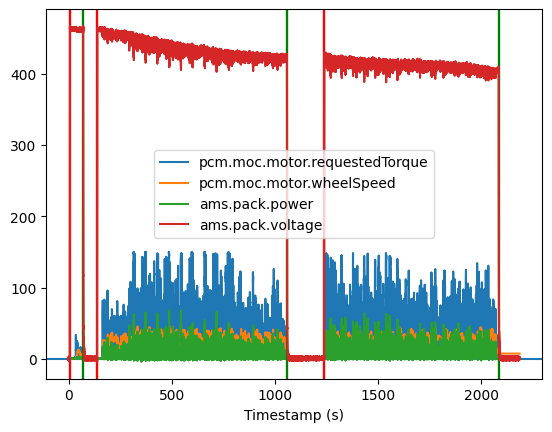

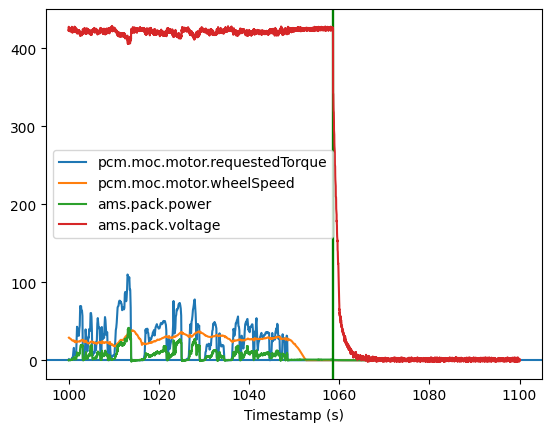

In [8]:
# Variables to graph
variables = [
    "pcm.moc.motor.requestedTorque",
    "pcm.moc.motor.wheelSpeed",
    "ams.pack.power",
    "ams.pack.voltage"
]
plt.axhline(y=0)
aly.plot(variables)

plt.axhline(y=0)
aly.plot(variables,  start_time = 1000, end_time = 1100, time_unit = "s")

Dual graph: Plot two different variables, and scale them differently for better visulization\
Variables comes in pair

graph for pcm.moc.motor.requestedTorque and pcm.moc.motor.wheelSpeed


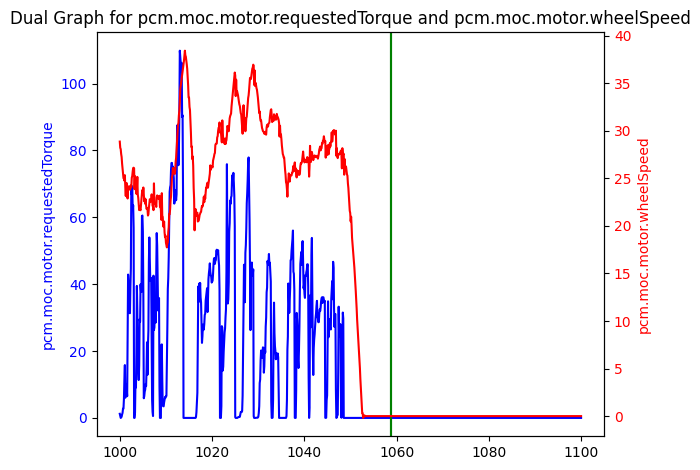




graph for ams.pack.power and ams.pack.voltage


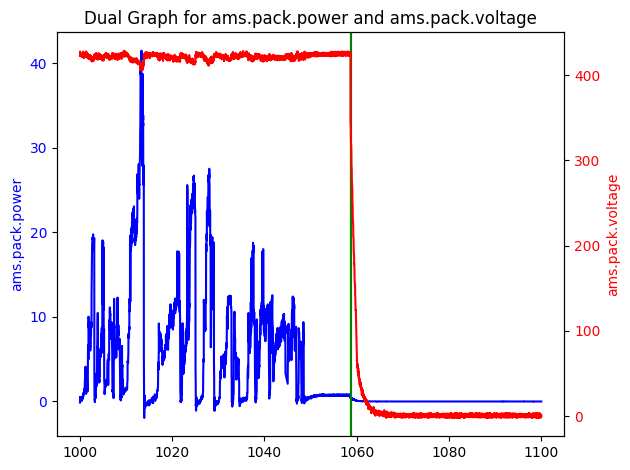

In [9]:
# Dual graph with different scale. Two variables per pair
variables = [
    "pcm.moc.motor.requestedTorque",
    "pcm.moc.motor.wheelSpeed",
    "ams.pack.power",
    "ams.pack.voltage"
]
aly.plot_dual(variables,  start_time = 1000, end_time = 1100, time_unit = "s")

Align input arrays, fill missing data with three different methods:\
connect\
extend_forward\
extend_backward

Cleaning outliers for Current (ams.pack.current). : 218137 windows [00:14, 15534.02 windows/s]


9 outliers found for Current (ams.pack.current).


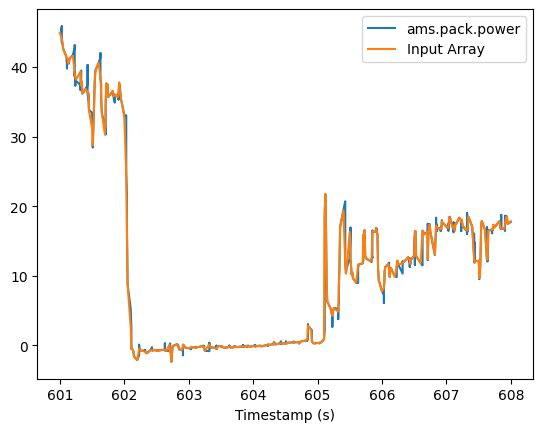

In [10]:
# Align variables for timestamp match

v_al = [
    "ams.pack.voltage",
    "ams.pack.current"
]

# match_type choices: connect, extend_forward, extend_backward
alist = aly.align_array(v_al, match_type="connect")
# alist[0] is aligned voltage; alist[1] is aligned current

# Helper to multiply two nparray for later plotting

product_second_col = alist[0][:, 1] * alist[1][:, 1] /1000 # Multiply every data to get power and correct unit
combined_array = np.column_stack((
    alist[0][:, 0],       # First column (shared)
    product_second_col,  # New second column (product)
    alist[0][:, 2],       # Third column (shared)
    alist[0][:, 3]        # Fourth column (shared)
))

# Compare to power sensor
variables = [
    "ams.pack.power",
    combined_array,
    ]
aly.plot(variables, start_time = 601, end_time = 608, time_unit = "s")

Built-in array calculation method

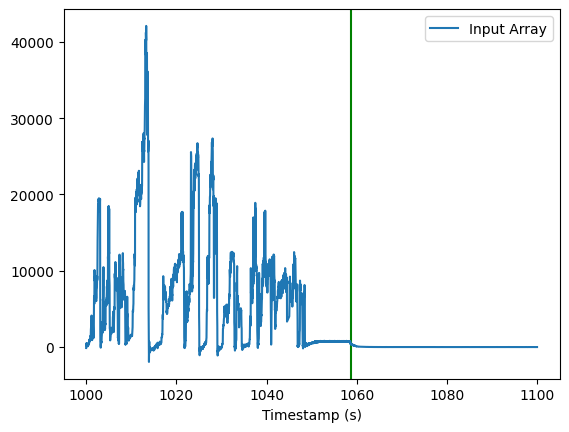

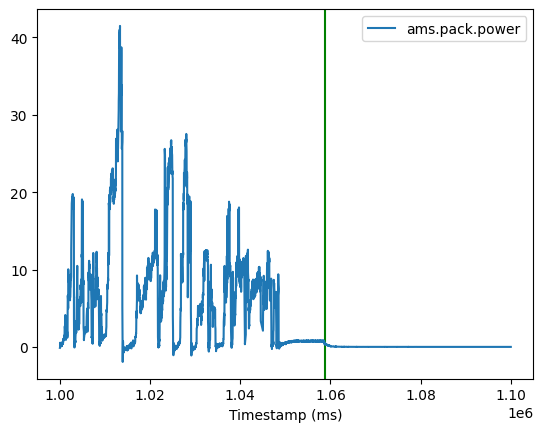

In [12]:
# Internel operation graph function
# Set the variable and the operations between them
v_op = [
    "ams.pack.voltage",
    "*",
    "ams.pack.current"
]

power = aly.get_compute_arrays(v_op, match_type="connect")

variables = [power]
aly.plot(variables, start_time = 1000, end_time = 1100, time_unit = "s")

variables = ["ams.pack.power"]
# Change time_unit to ms
aly.plot(variables, start_time = 1000000, end_time = 1100000, time_unit = "ms")

FFT for data smoothing

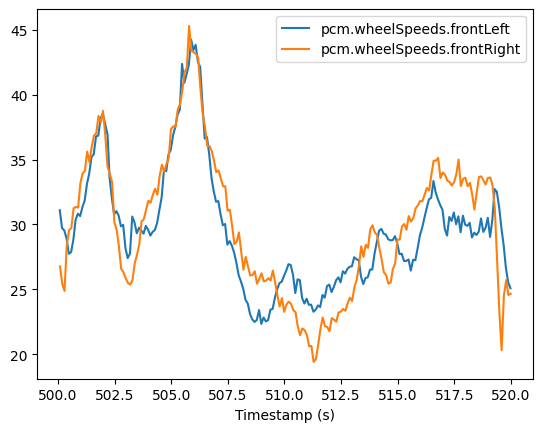

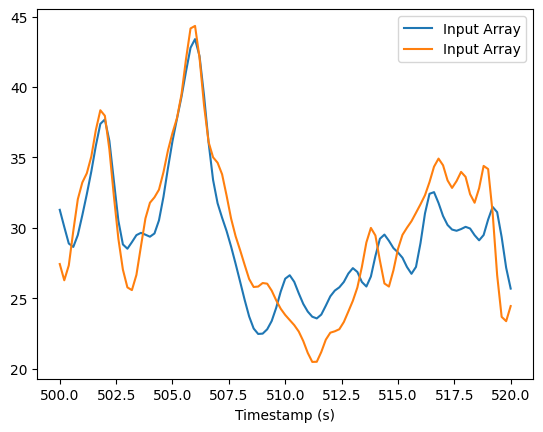

In [19]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.plot(variables, start_time = 500, end_time = 520)

fft_arr = aly.get_band_filter(variables, sample_frequency=5, filtered_lower_band=1)
aly.plot(fft_arr, start_time = 500, end_time = 520)